In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)
import warnings
warnings.filterwarnings('ignore')

In [12]:
from matplotlib.pylab import rcParams
rcParams['font.family'] = 'malgun Gothic'
rcParams['figure.figsize'] = 17,8


In [8]:
test = pd.read_csv('./titanic.csv',encoding='utf-8', index_col=0)
print(test.shape)
test.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


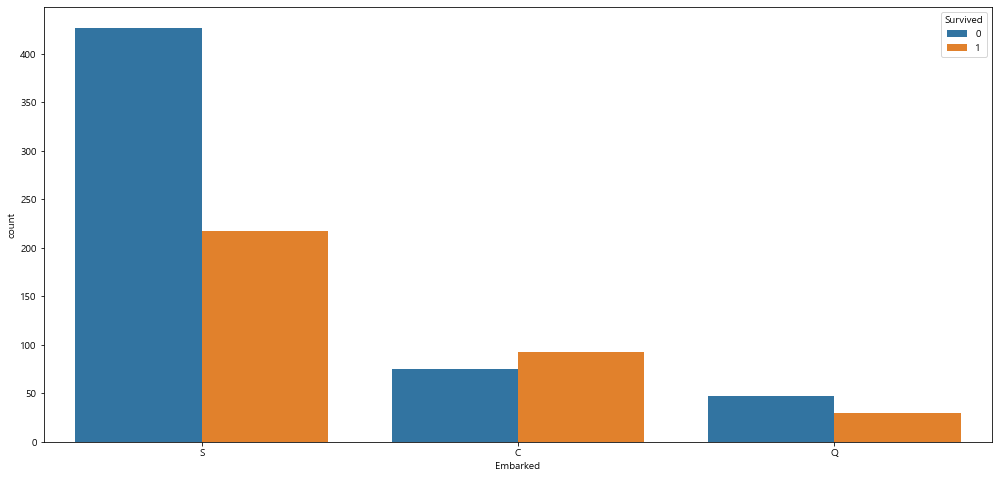

In [13]:
sns.countplot(data=test, x= 'Embarked',hue='Survived')
plt.show()

In [18]:
# Embarked 칼럼에서 결측치가 있는 데이터 확인
test[test['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [19]:
# Embarked의 값이 'S'인 데이터 확인
test[test['Embarked']=='S']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [20]:
# null 값을 S로 채우기
test.Embarked = test.Embarked.fillna('S')

In [27]:
## Q. 각각의 승선 위치마다 승객이 몇명이 탔을까요? % 로 나타내 주세요
print(((test['Embarked']=='S').value_counts())/814 *100)
print(((test['Embarked']=='C').value_counts())/814 *100)
print(((test['Embarked']=='Q').value_counts())/814 *100)


True     79.361179
False    30.098280
Name: Embarked, dtype: float64
False    88.820639
True     20.638821
Name: Embarked, dtype: float64
False    100.000000
True       9.459459
Name: Embarked, dtype: float64


In [29]:
test.Embarked.value_counts()/test.shape[0]*100

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

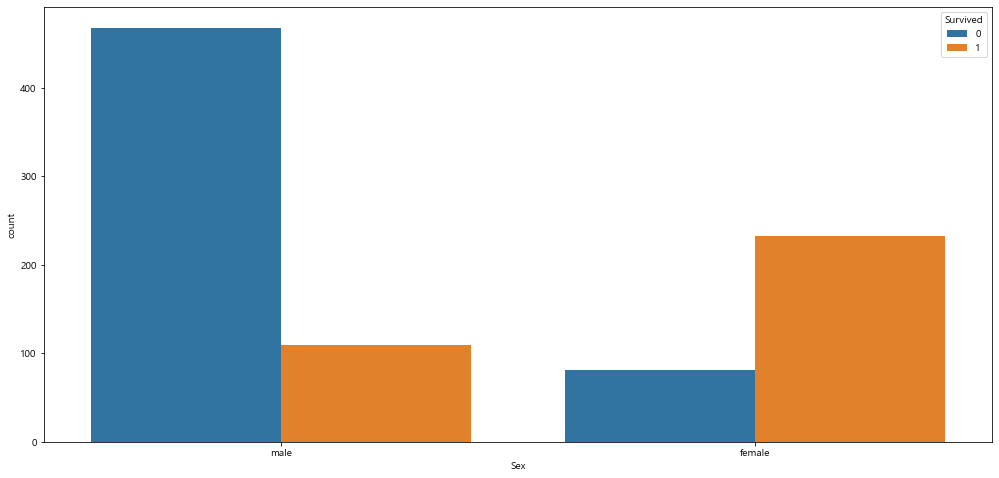

In [31]:
# 성별에 따라 사람들이 얼마나 생존했는지 알고 싶어요 (시각화)
sns.countplot(data=test, x='Sex',hue='Survived')
plt.show()

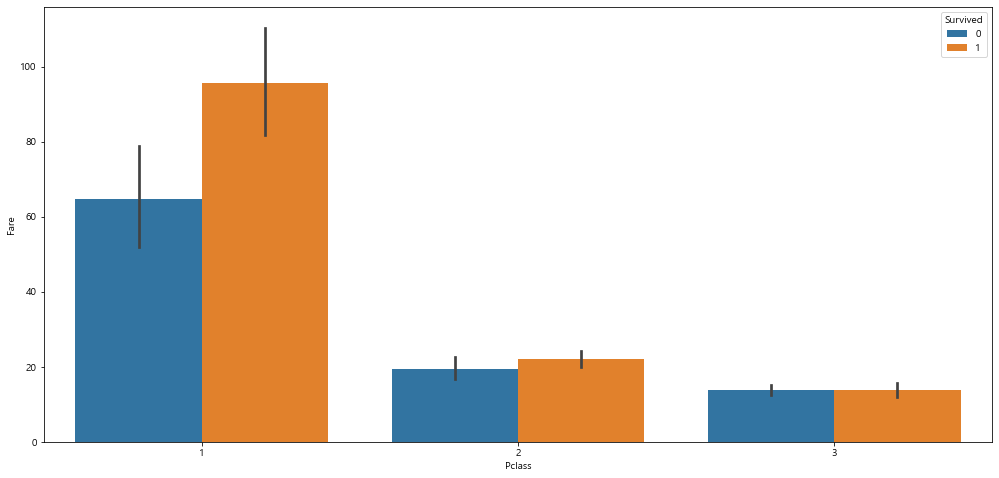

In [32]:
# x축:Pclass , y축: Fare hue: Survived 
sns.barplot(data=test, x='Pclass', y= 'Fare', hue='Survived')
plt.show()

In [33]:
#  요금이 500불 이상인 사람의 데이터를 뽑아주세요.
test[test['Fare']>=500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [38]:
# 위 세명의 요금을 1/3로 수정해주세요.
test.loc[test.Fare>=500, 'Fare']= 512/3


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


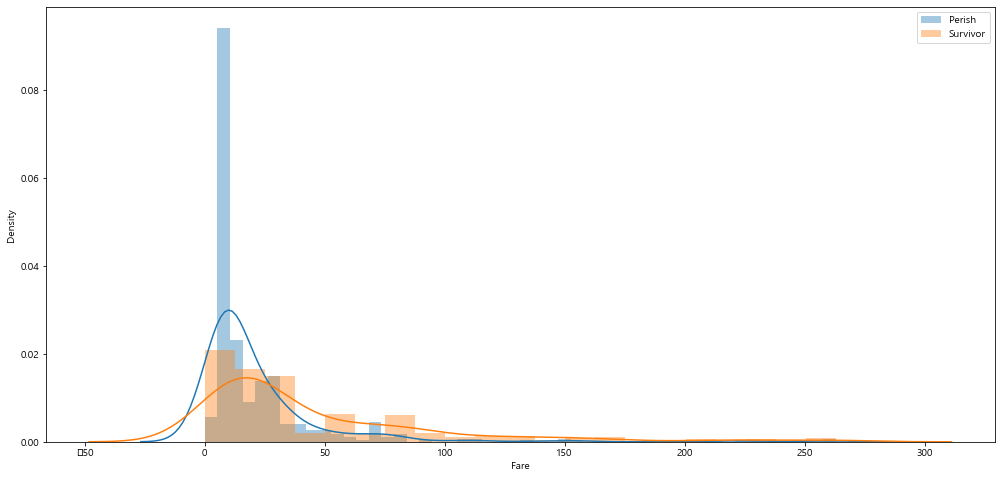

In [47]:
# 생존자, 비생존자의 distplot 그리기(요금)
perish = test[test.Survived==0]
survivor = test[test.Survived==1]

sns.distplot(perish.Fare,label = 'Perish')
sns.distplot(survivor.Fare,label='Survivor')
plt.legend()
plt.show()

## lmplot

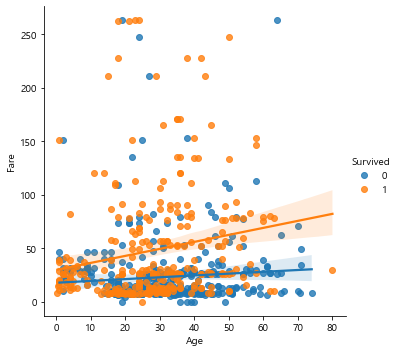

In [51]:
sns.lmplot(data=test, x="Age",y="Fare", hue= 'Survived')

<function matplotlib.pyplot.show(close=None, block=None)>

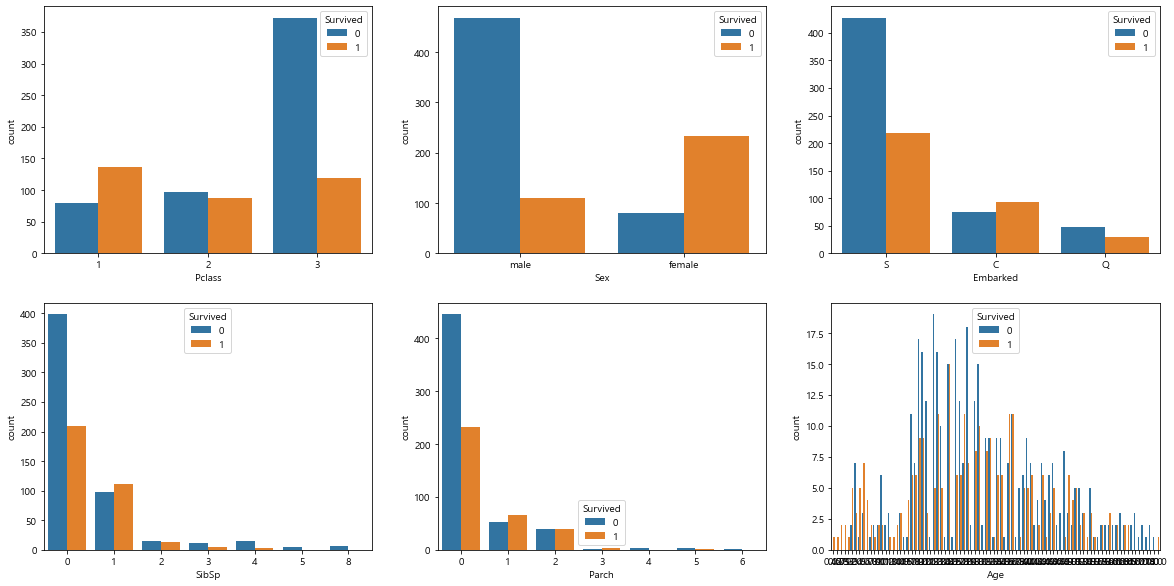

In [68]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3,nrows=2,figsize =(20,10))
sns.countplot(data= test, x='Pclass',hue='Survived',ax=ax1)
sns.countplot(data= test, x='Sex',hue='Survived',ax=ax2)
sns.countplot(data= test, x='Embarked',hue='Survived',ax=ax3)
sns.countplot(data= test, x='SibSp',hue='Survived',ax=ax4)
sns.countplot(data= test, x='Parch',hue='Survived',ax=ax5)
sns.countplot(data= test, x='Age',hue='Survived',ax=ax6)
plt.show

<AxesSubplot:xlabel='Age', ylabel='count'>

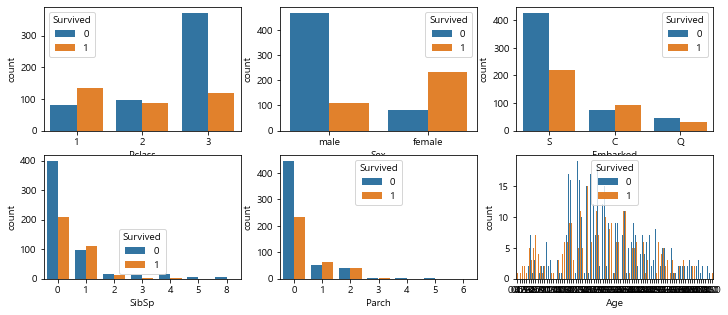

In [63]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
                                    ncols = 3,  #컬럼이 총 3개, 행은 자동으로 1이 됨
                                    nrows = 2, 
                                    figsize = (12, 5))

sns.countplot(data=test, x = "Pclass", hue="Survived", ax=ax1)
sns.countplot(data=test, x = "Sex", hue="Survived", ax=ax2)
sns.countplot(data=test, x = "Embarked", hue="Survived", ax=ax3)
sns.countplot(data=test, x = "SibSp", hue="Survived",ax=ax4)
sns.countplot(data=test, x = "Parch", hue="Survived",ax=ax5)
sns.countplot(data=test, x = "Age", hue="Survived",ax=ax6)